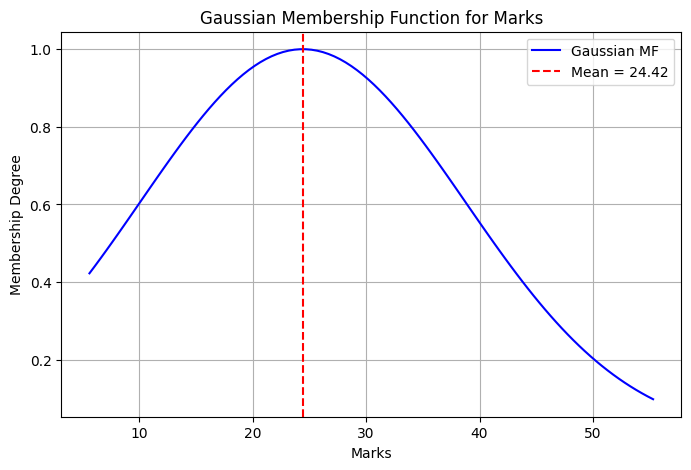

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Student_Marks.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Extract the 'Marks' column
marks = df["Marks"]

# Compute mean and standard deviation
mean_marks = marks.mean()
std_marks = marks.std()

# Define Gaussian membership function
def gaussian_mf(x, c, sigma):
    return np.exp(-((x - c) ** 2) / (2 * sigma ** 2))

# Generate values for plotting
x_values = np.linspace(marks.min(), marks.max(), 100)
y_values = gaussian_mf(x_values, mean_marks, std_marks)

# Plot the Gaussian membership function
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label="Gaussian MF", color="b")
plt.axvline(mean_marks, color="r", linestyle="--", label=f"Mean = {mean_marks:.2f}")
plt.xlabel("Marks")
plt.ylabel("Membership Degree")
plt.title("Gaussian Membership Function for Marks")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("Student_Marks.csv")

class GaussianFuzzySet:
    def __init__(self, mean, sigma):
        self.mean = mean  # Center of the Gaussian function
        self.sigma = sigma  # Standard deviation

    def membership(self, x):
        return np.exp(-0.5 * ((x - self.mean) / self.sigma) ** 2)

    def area(self):
        return self.sigma * np.sqrt(2 * np.pi)

    def centroid(self):
        return self.mean

# Extract relevant columns
time_study = df['time_study'].values
marks = df['Marks'].values

# Define fuzzy sets for Rule 1 (low study hours, low marks)
time_low = GaussianFuzzySet(0.5, 0.5)  # Centered around 0-1 hours
marks_low = GaussianFuzzySet(np.min(marks), np.std(marks))

# Define fuzzy sets for Rule 2 (high study hours, high marks)
time_high = GaussianFuzzySet(7, 0.5)  # Centered around 6-8 hours
marks_high = GaussianFuzzySet(np.max(marks), np.std(marks))

# Input values for Rule 1 and Rule 2
time_input_r1 = 0.5  # Example for Rule 1
time_input_r2 = 7    # Example for Rule 2

# Apply fuzzy logic rules
z1 = time_low.membership(time_input_r1) * marks_low.membership(time_input_r1)
z2 = time_high.membership(time_input_r2) * marks_high.membership(time_input_r2)

print("Rule 1: If study hours are low, then marks are low")
print("Membership value for study hours (R1):", time_low.membership(time_input_r1))
print("Membership value for marks (R1):", marks_low.membership(time_input_r1))
print("z1 =", z1)

print("Rule 2: If study hours are high, then marks are high")
print("Membership value for study hours (R2):", time_high.membership(time_input_r2))
print("Membership value for marks (R2):", marks_high.membership(time_input_r2))
print("z2 =", z2)

# Calculate centroids
c1num = (z1 * marks_low.area() * marks_low.centroid()) + (z2 * marks_high.area() * marks_high.centroid())
c1den = (z1 * marks_low.area() + z2 * marks_high.area())
c1 = c1num / c1den

print("Predicted Marks =", c1)

Rule 1: If study hours are low, then marks are low
Membership value for study hours (R1): 1.0
Membership value for marks (R1): 0.9377883455899405
z1 = 0.9377883455899405
Rule 2: If study hours are high, then marks are high
Membership value for study hours (R2): 1.0
Membership value for marks (R2): 0.0032131853484619302
z2 = 0.0032131853484619302
Predicted Marks = 5.7786736665304375
